In [4]:
#To predict the sales of each product in an outlet
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
unique= train.apply(pd.unique)
unique

Item_Identifier              [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Weight                  [9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...
Item_Fat_Content                          [Low Fat, Regular, low fat, LF, reg]
Item_Visibility              [0.016047301, 0.019278216, 0.016760075, 0.0, 0...
Item_Type                    [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
Item_MRP                     [249.8092, 48.2692, 141.618, 182.095, 53.8614,...
Outlet_Identifier            [OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...
Outlet_Establishment_Year    [1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...
Outlet_Size                                         [Medium, nan, High, Small]
Outlet_Location_Type                                  [Tier 1, Tier 3, Tier 2]
Outlet_Type                  [Supermarket Type1, Supermarket Type2, Grocery...
Item_Outlet_Sales            [3735.138, 443.4228, 2097.27, 732.38, 994.7052...
dtype: object

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# **Null values in Item_Weight**

In [8]:
items=(pd.DataFrame(train['Item_Type']).apply(pd.unique))
items=(items.values).tolist()
items=[item[0] for item in items]
print(items)
items_id=(pd.DataFrame(train['Item_Identifier']).apply(pd.unique))
items_id=(items_id.values).tolist()
items_id=[item[0] for item in items_id]
print(items_id)
print("Number of unique items:",len(items_id))

['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10', 'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46', 'FDF32', 'FDP49', 'NCB42', 'DRI11', 'FDU02', 'FDN22', 'FDW12', 'NCB30', 'FDC37', 'FDR28', 'NCD06', 'FDV10', 'DRJ59', 'FDE51', 'FDC14', 'FDV38', 'NCS17', 'FDP33', 'FDO23', 'DRH01', 'NCX29', 'FDV20', 'DRZ11', 'FDX10', 'FDB34', 'FDK43', 'FDA46', 'FDC02', 'FDL50', 'FDM39', 'NCP05', 'FDV49', 'FDL12', 'FDS02', 'NCL17', 'FDM40', 'FDR13', 'FDA43', 'NCP18', 'FDK21', 'NCX54', 'DRK35', 'FDY21', 'FDI26', 'FDM20', 'FDV27', 'FDF09', 'FDY40', 'FDY45', 'FDC46', 'FDH19', 'FDZ03', 'DRH37', 'NCI17', 'FDJ58', 'FDH35', 'FDG02', 'NCZ18', 'FDC29', 'FDQ10', 'FDN48', 'FDL04', 'FDV25', 'FDD58', 'FDN04', 'FDV45', 'NCL18', 'FDR12', 'FDG20', 'FDZ55', 'FDQ49', 'FDN33',

In [9]:
#Replacing the null values with their mean values with respective to the item_id
for i in items_id:
  x=train[train['Item_Identifier']==i]
  train['Item_Weight'].fillna(x['Item_Weight'].mean(),inplace=True)

C:\Users\Ashwin Chandar\AppData\Local\Temp\ipykernel_31412\1814043901.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna(x['Item_Weight'].mean(),inplace=True)


In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# **Null values in Outlet_Size**

In [11]:
col=['Outlet_Size','Outlet_Location_Type','Outlet_Type']
print("Number of Tier 1:",len(train[train[col[1]]=='Tier 1']))
print("Number of Tier 2:",len(train[train[col[1]]=='Tier 2']))
print("Number of Tier 3:",len(train[train[col[1]]=='Tier 3']))

Number of Tier 1: 2388
Number of Tier 2: 2785
Number of Tier 3: 3350


In [12]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
a = train[(train[col[1]] == 'Tier 1') & (train['Outlet_Size'] == 'Small')]
print("Number of Tier 1 Small:",len(a))
a = train[(train[col[1]] == 'Tier 1') & (train['Outlet_Size'] == 'Medium')]
print("Number of Tier 1 Medium:",len(a))
a = train[(train[col[1]] == 'Tier 1') & (train['Outlet_Size'] == 'High')]
print("Number of Tier 1 High:",len(a))

print()

a = train[(train[col[1]] == 'Tier 2') & (train['Outlet_Size'] == 'Small')]
print("Number of Tier 2 Small:",len(a))
a = train[(train[col[1]] == 'Tier 2') & (train['Outlet_Size'] == 'Medium')]
print("Number of Tier 2 Medium:",len(a))
a = train[(train[col[1]] == 'Tier 2') & (train['Outlet_Size'] == 'High')]
print("Number of Tier 2 High:",len(a))

print()

a = train[(train[col[1]] == 'Tier 3') & (train['Outlet_Size'] == 'Small')]
print("Number of Tier 3 Small:",len(a))
a = train[(train[col[1]] == 'Tier 3') & (train['Outlet_Size'] == 'Medium')]
print("Number of Tier 3 Medium:",len(a))
a = train[(train[col[1]] == 'Tier 3') & (train['Outlet_Size'] == 'High')]
print("Number of Tier 3 High:",len(a))

Number of Tier 1 Small: 1458
Number of Tier 1 Medium: 930
Number of Tier 1 High: 0

Number of Tier 2 Small: 930
Number of Tier 2 Medium: 0
Number of Tier 2 High: 0

Number of Tier 3 Small: 0
Number of Tier 3 Medium: 1863
Number of Tier 3 High: 932


In [14]:
*train.columns,

('Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales')

In [15]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [16]:
col=['Outlet_Size','Outlet_Location_Type','Outlet_Type']
tier=['Tier 1','Tier 2','Tier 3']
def SMtype1(train,tier):
  print("Supermarket Type1:")
  print()
  for i in tier:
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Small') & (train['Outlet_Type'] == 'Supermarket Type1')]
    print("Number of",i,"Small,Supermarket Type1 :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Medium') & (train['Outlet_Type'] == 'Supermarket Type1')]
    print("Number of",i,"Medium,Supermarket Type1 :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'High') & (train['Outlet_Type'] == 'Supermarket Type1')]
    print("Number of",i,"High,Supermarket Type1 :",len(a))
    print()

SMtype1(train,tier)

def SMtype2(train,tier):
  print("Supermarket Type2:")
  print()
  for i in tier:
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Small') & (train['Outlet_Type'] == 'Supermarket Type2')]
    print("Number of",i,"Small,Supermarket Type2 :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Medium') & (train['Outlet_Type'] == 'Supermarket Type2')]
    print("Number of",i,"Medium,Supermarket Type2 :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'High') & (train['Outlet_Type'] == 'Supermarket Type2')]
    print("Number of",i,"High,Supermarket Type2 :",len(a))
    print()
SMtype2(train,tier)

def SMtype3(train,tier):
  print("Supermarket Type3")
  print()
  for i in tier:
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Small') & (train['Outlet_Type'] == 'Supermarket Type3')]
    print("Number of",i,"Small,Supermarket Type3 :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Medium') & (train['Outlet_Type'] == 'Supermarket Type3')]
    print("Number of",i,"Medium,Supermarket Type3 :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'High') & (train['Outlet_Type'] == 'Supermarket Type3')]
    print("Number of",i,"High,Supermarket Type3 :",len(a))
    print()
SMtype3(train,tier)

def Grocer(train,tier):
  print("Grocery Store")
  print()
  for i in tier:
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Small') & (train['Outlet_Type'] == 'Grocery Store')]
    print("Number of",i,"Small,Grocery Store :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'Medium') & (train['Outlet_Type'] == 'Grocery Store')]
    print("Number of",i,"Medium,Grocery Store :",len(a))
    a = train[(train['Outlet_Location_Type'] == i) & (train['Outlet_Size'] == 'High') & (train['Outlet_Type'] == 'Grocery Store')]
    print("Number of",i,"High,Grocery Store :",len(a))
    print()
Grocer(train,tier)

Supermarket Type1:

Number of Tier 1 Small,Supermarket Type1 : 930
Number of Tier 1 Medium,Supermarket Type1 : 930
Number of Tier 1 High,Supermarket Type1 : 0

Number of Tier 2 Small,Supermarket Type1 : 930
Number of Tier 2 Medium,Supermarket Type1 : 0
Number of Tier 2 High,Supermarket Type1 : 0

Number of Tier 3 Small,Supermarket Type1 : 0
Number of Tier 3 Medium,Supermarket Type1 : 0
Number of Tier 3 High,Supermarket Type1 : 932

Supermarket Type2:

Number of Tier 1 Small,Supermarket Type2 : 0
Number of Tier 1 Medium,Supermarket Type2 : 0
Number of Tier 1 High,Supermarket Type2 : 0

Number of Tier 2 Small,Supermarket Type2 : 0
Number of Tier 2 Medium,Supermarket Type2 : 0
Number of Tier 2 High,Supermarket Type2 : 0

Number of Tier 3 Small,Supermarket Type2 : 0
Number of Tier 3 Medium,Supermarket Type2 : 928
Number of Tier 3 High,Supermarket Type2 : 0

Supermarket Type3

Number of Tier 1 Small,Supermarket Type3 : 0
Number of Tier 1 Medium,Supermarket Type3 : 0
Number of Tier 1 High,Su

We see that all **Grocery Stores** are **'Small'** irrespective of the tier

Similiarly,

**Supermarket Type3** are **'Medium'** irrespective of the tier

**Supermarket Type2** are **'Medium'** irrespective of the tier

Considering **Supermarket Type1**:

Tier1 or Tier2 : Small

Tier3 : High


In [17]:
"""
Grocery store     = Small
Supermarket Type3 = Medium
Supermarket Type2 = Medium
Supermarket Type1 :
                    Tier1/Tier2 : Medium
                          Tier3 : High
"""
def outlet_size(row):
    if row['Outlet_Type'] == 'Grocery Store':
        return 'Small'
    elif row['Outlet_Type'] == 'Supermarket Type3':
        return 'Medium'
    elif row['Outlet_Type'] == 'Supermarket Type2':
        return 'Medium'
    elif row['Outlet_Type'] == 'Supermarket Type1' and (row['Outlet_Location_Type'] in ['Tier 1', 'Tier 2']):
        return 'Medium'
    else:
        return 'High'

train.loc[train['Outlet_Size'].isnull(), 'Outlet_Size'] = train[train['Outlet_Size'].isnull()].apply(outlet_size, axis=1)

In [18]:
#Null Values have been removed
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Changing 'reg', 'LF', 'low fat' to 'Regular' or 'Low Fat'

In [20]:
col=['Item_Fat_Content','Item_Type','Outlet_Type',]
*train[col].apply(pd.unique),

(array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
        'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
        'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
        'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object),
 array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object))

In [21]:
train['Item_Fat_Content']
for i in train['Item_Fat_Content']:
  if i=='low fat':
    train['Item_Fat_Content'].replace(i,'Low Fat',inplace=True)
  elif i=='LF':
    train['Item_Fat_Content'].replace(i,'Low Fat',inplace=True)
  elif i=='reg':
    train['Item_Fat_Content'].replace(i,'Regular',inplace=True)

C:\Users\Ashwin Chandar\AppData\Local\Temp\ipykernel_31412\4060412854.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Fat_Content'].replace(i,'Low Fat',inplace=True)
C:\Users\Ashwin Chandar\AppData\Local\Temp\ipykernel_31412\4060412854.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [22]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Calculating Age of the Outlet

In [23]:
train['Market_Age']=2024-train['Outlet_Establishment_Year']
train.drop(columns=['Outlet_Establishment_Year'],inplace=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Market_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,15


In [24]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Market_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.246964,0.066132,140.992782,2181.288914,26.168133
std,4.433959,0.051598,62.275067,1706.499616,8.371760
min,4.555000,0.000000,31.290000,33.290000,15.000000
25%,9.300000,0.026989,93.826500,834.247400,20.000000
50%,11.000000,0.053931,143.012800,1794.331000,25.000000
75%,16.000000,0.094585,185.643700,3101.296400,37.000000
max,21.350000,0.328391,266.888400,13086.964800,39.000000


In [25]:
train.to_csv("train_cleaned.csv")

In [26]:
train[train['Item_Identifier']=='NCD19']['Item_Visibility']

4       0.000000
522     0.022060
802     0.000000
2129    0.013179
2907    0.013254
3428    0.000000
Name: Item_Visibility, dtype: float64

# **Data Analysis and Visualization**

In [27]:
import matplotlib.pyplot as plt
category=train['Item_Fat_Content'].value_counts()
print(category)
outlet=train['Outlet_Size'].value_counts()
print(outlet)
print()
Location_Type=train['Outlet_Location_Type'].value_counts()
print(Location_Type)
print()
Outlet_Type=train['Outlet_Type'].value_counts()
print(Outlet_Type)
outlet_type=train['Outlet_Type'].value_counts()
print(outlet_type)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
Outlet_Size
Medium    4648
Small     2943
High       932
Name: count, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


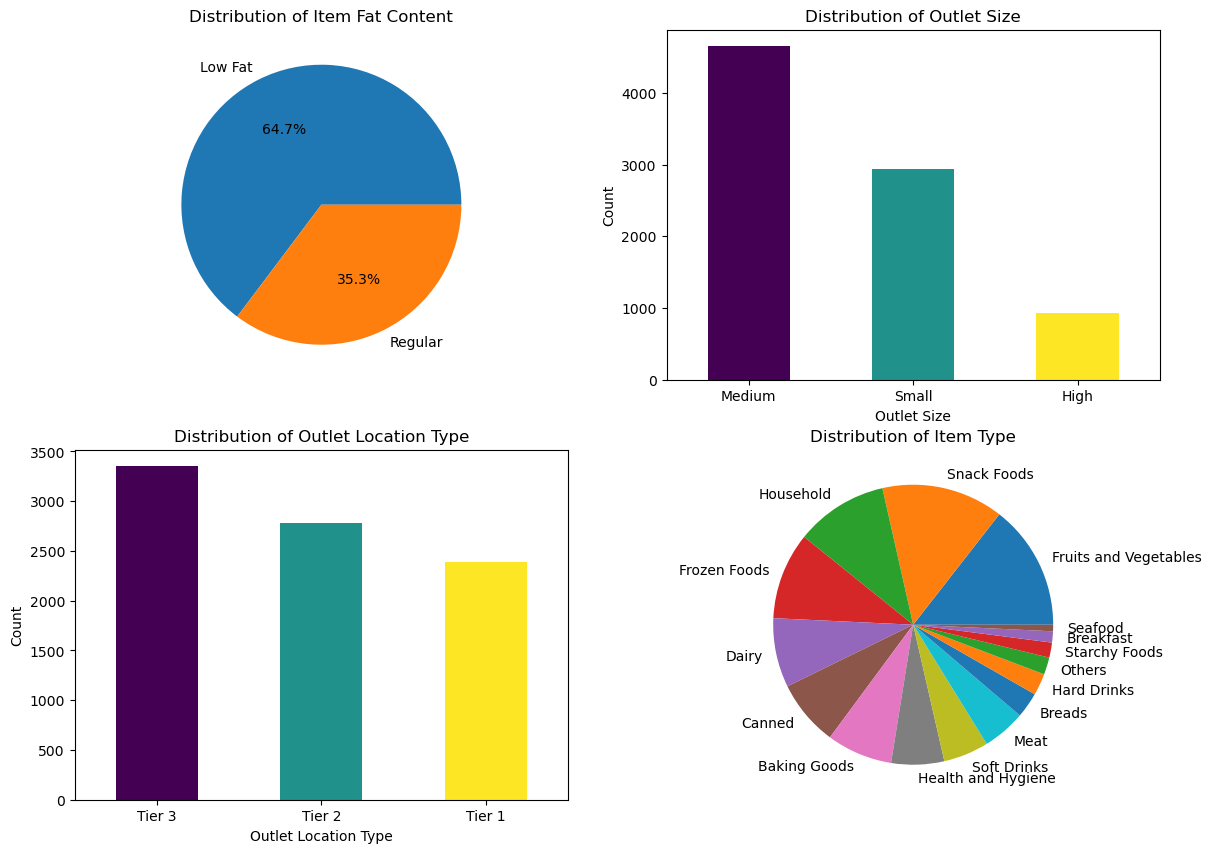

In [28]:
#General Graph Representation
#UNIVARIATE ANALYSIS

import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colours=plt.cm.viridis(np.linspace(0,1,len(category)))
category.plot(kind='pie', color=colours, ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Distribution of Item Fat Content')
axes[0,0].set_ylabel('')
axes[0,0].tick_params(axis='x', rotation=0)


colours=plt.cm.viridis(np.linspace(0,1,len(outlet)))
outlet.plot(kind='bar', color=colours, ax=axes[0,1])
axes[0,1].set_title('Distribution of Outlet Size')
axes[0,1].set_xlabel('Outlet Size')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=0)

colours=plt.cm.viridis(np.linspace(0,1,len(Location_Type)))
Location_Type.plot(kind='bar',color=colours,ax=axes[1,0])
axes[1,0].set_title('Distribution of Outlet Location Type')
axes[1,0].set_xlabel('Outlet Location Type')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=0)

item=train['Item_Type'].value_counts()
item.plot(kind='pie', ax=axes[1,1])
axes[1,1].set_title('Distribution of Item Type')
axes[1,1].set_ylabel('')
axes[1,1].tick_params(axis='x', rotation=70)


plt.show()

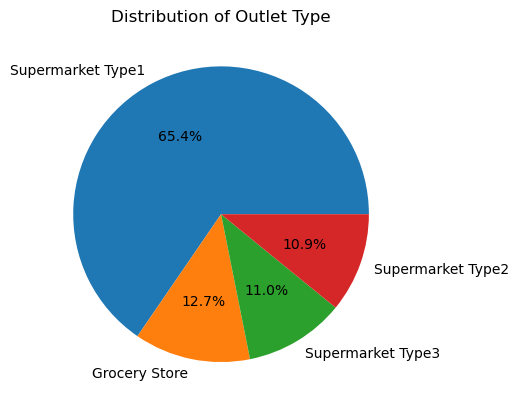

In [29]:
outlet_type.plot(kind='pie',autopct="%1.1f%%")
plt.title("Distribution of Outlet Type")
plt.ylabel("")
plt.show()

In [30]:
 print("Medium Sized Outlets percentage:",((outlet['Medium']*100/sum(outlet)).round(2)),"%")
print("Small Sized Outlets percentage:",((outlet['Small']*100/sum(outlet)).round(2)),"%")
print("High Sized Outlets percentage:",((outlet['High']*100/sum(outlet)).round(2)),"%")

Medium Sized Outlets percentage: 54.53 %
Small Sized Outlets percentage: 34.53 %
High Sized Outlets percentage: 10.94 %


From this we can derive that,



1.   The number of Fruits and Vegetables, Snack Foods, Household and Frozen foods contribute to **nearly half** of the total items present.
2.   Low fat content Food are more preferred than Regular Fat content food.
3.   There are ***more number of Medium Sized outlets*** than Small-Sized and High-Sized Outlet combined together.
4.   There are more number of Supermarket Type1(around 65%) than all of the other outlet types.


In [31]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

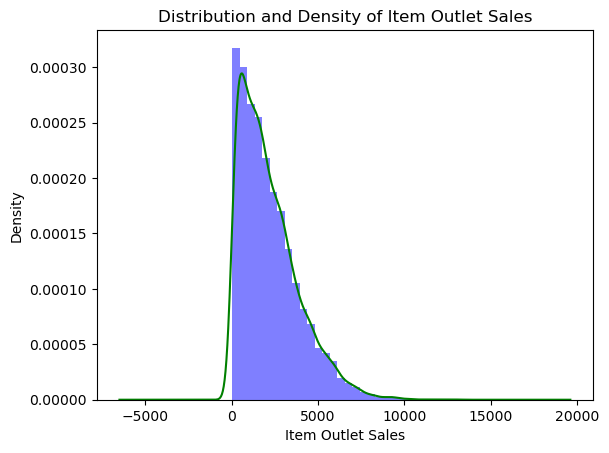

In [32]:
#KDE- Kernel Density Estimate- Probability Distribution Function
#Item_Outlet_Sales Analysis

train['Item_Outlet_Sales'].plot(kind='hist', bins=30, alpha=0.5, density=True, color='blue')
train['Item_Outlet_Sales'].plot(kind='kde', color='green')

plt.title('Distribution and Density of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.show()

This graph indicates a **Right-Skewed Distribution**, where most of the data points are on the left side and very few are on the right side.

This indicates that most of the products have low sales(left side) and very few products which can be considered as best sellers have high sales. Do note that this graph represent the Overall sales of the products of **all** the outlets

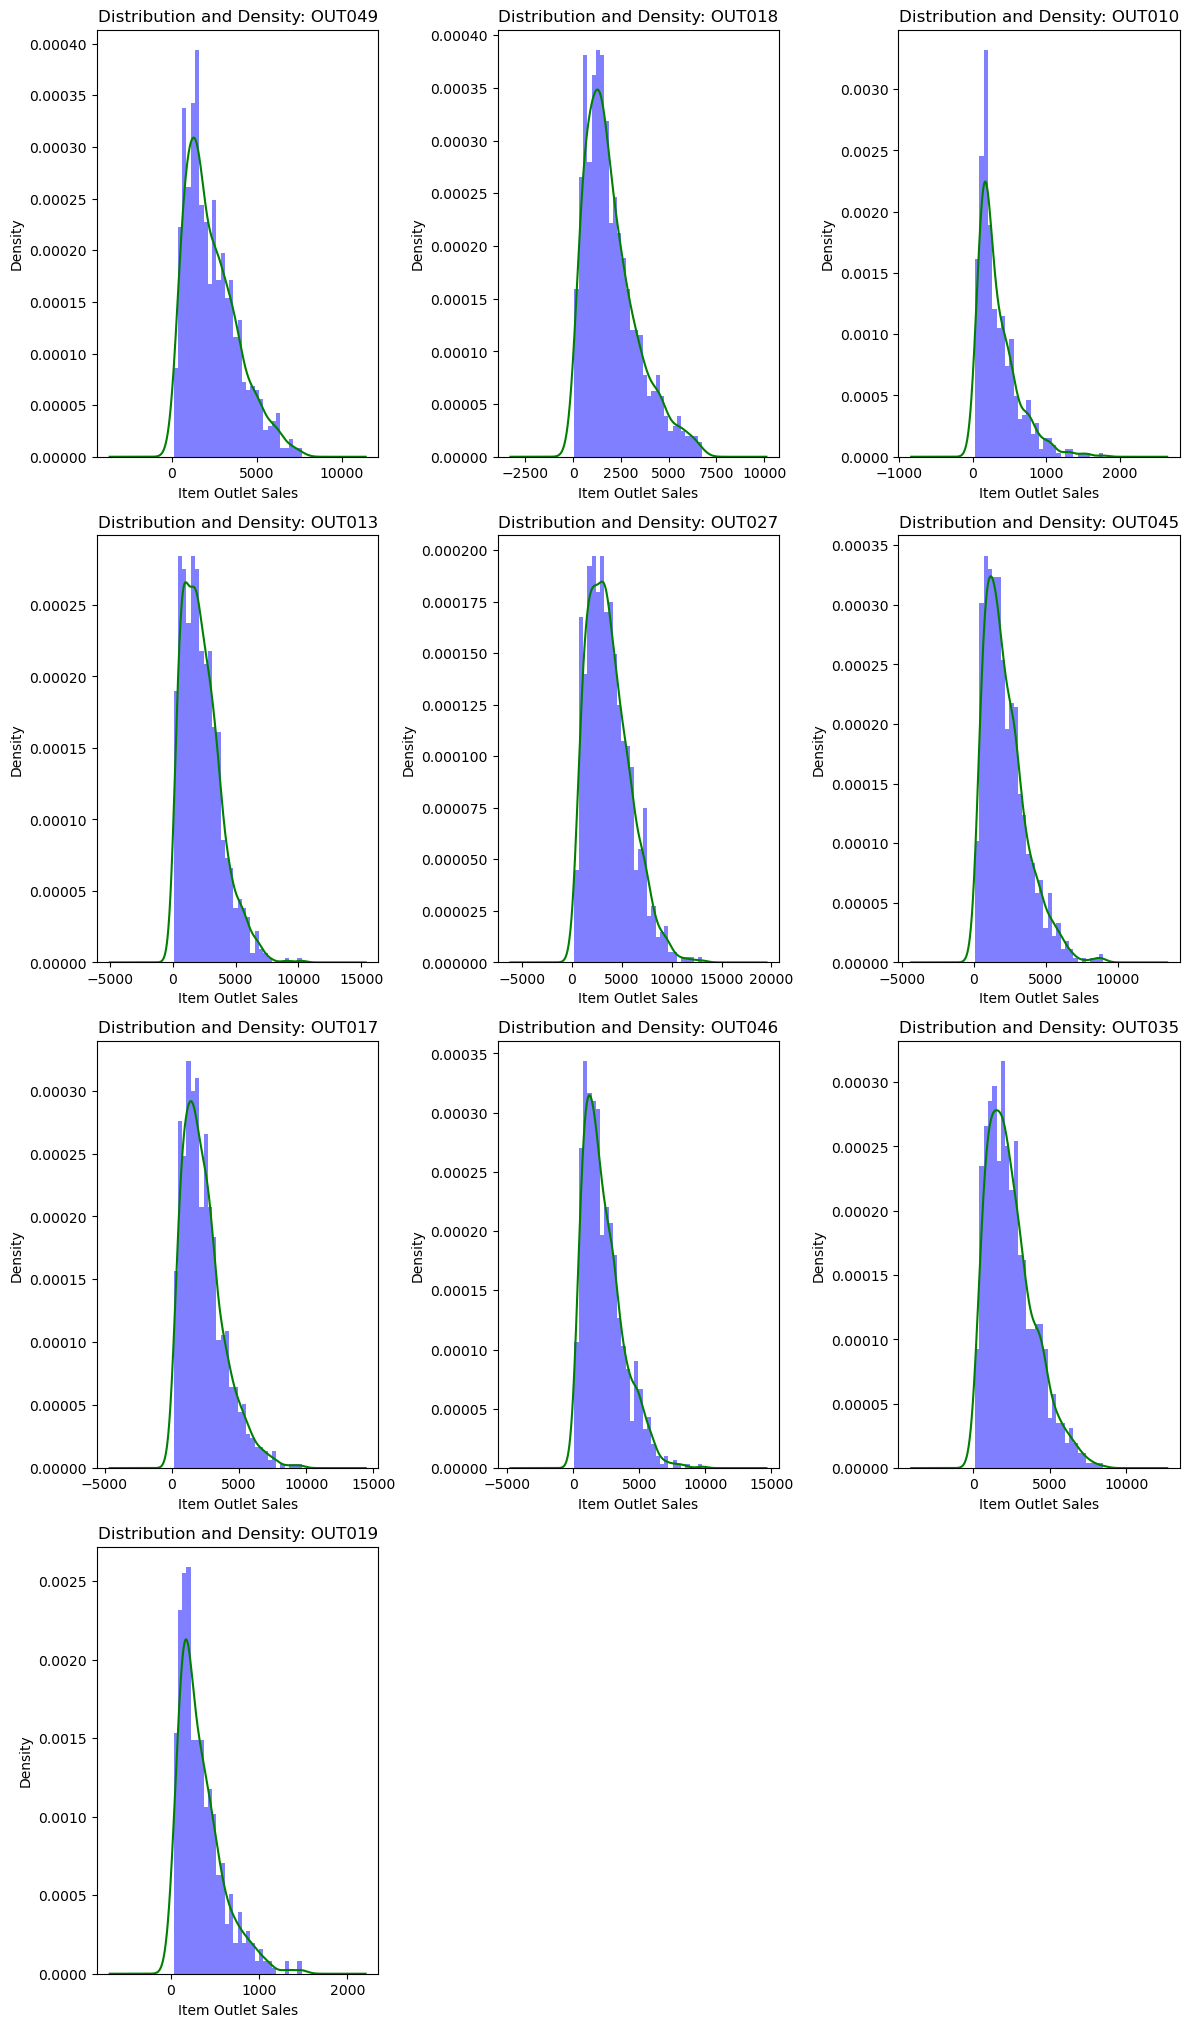

In [33]:
#Item_Sales with respect to each outlets present
import matplotlib.pyplot as plt

outlets = train['Outlet_Identifier'].unique()
n_outlets = len(outlets)

rows = (n_outlets + 1) // 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))

axes = axes.flatten()

for idx, i in enumerate(outlets):
    a = train[train['Outlet_Identifier'] == i]
    ax = axes[idx]
    a['Item_Outlet_Sales'].plot(kind='hist', bins=30, alpha=0.5, density=True, color='blue', ax=ax)
    a['Item_Outlet_Sales'].plot(kind='kde', color='green', ax=ax)
    ax.set_title(f'Distribution and Density: {i}')
    ax.set_xlabel('Item Outlet Sales')
    ax.set_ylabel('Density')

for idx in range(len(outlets), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


*Inference*

We can observe that all the sales of the individual outlets are mostly similiar, indicating **Uniform Sales** and **consistent sales performance** across all the outlets.

Further, Most products are low selling (most data points are on the left side) and are numerically dominant.

Whereas, a few best selling items (data points on the left side) contribute financially and are dominant financially and not numerically, or in other words, they generate more revenue, despite being fewer in number.

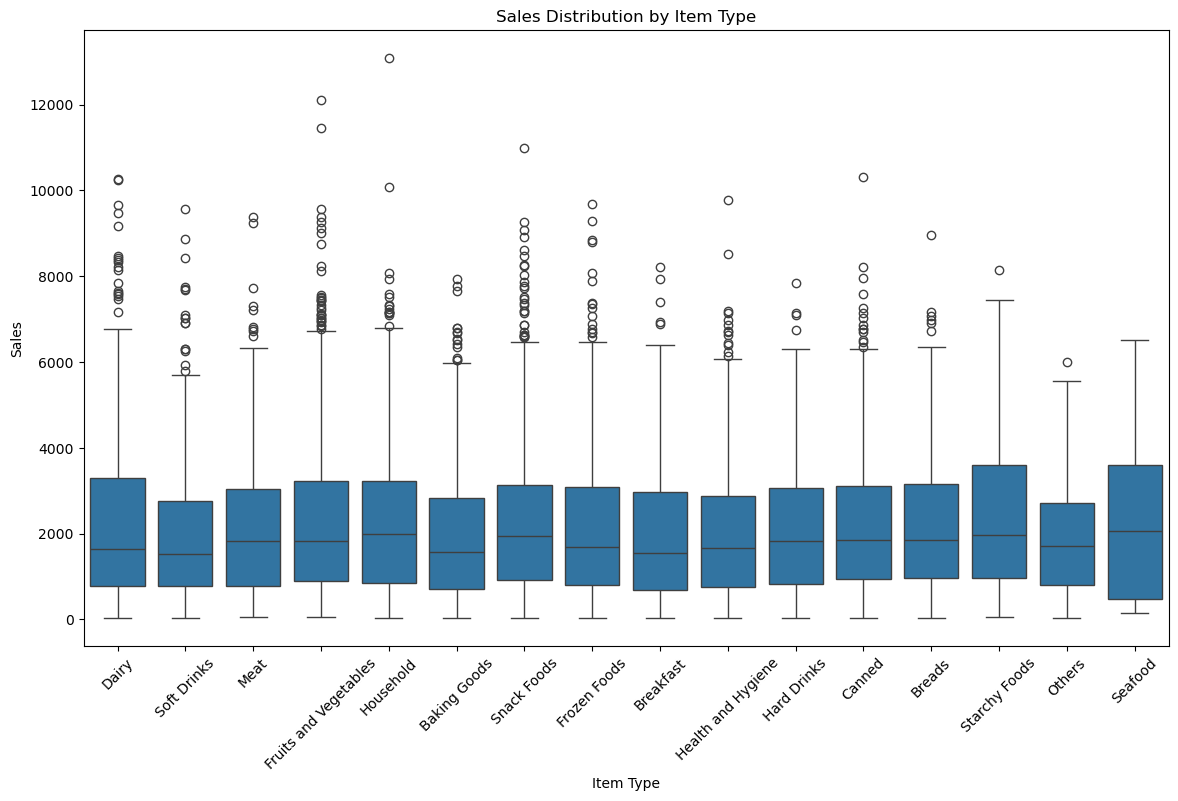

In [34]:
import seaborn as sns

# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.title('Sales Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In the above box plot, we see many outliers above the Inter- Quartile range and bound which means that they are best selling.

But this is done using total sales. Sale of 1 costly product might quantify the same as sale of a number of lower cost items.

Thus the number of items sold are calculated by dividing Item Sales by Item_MRP and are used for finding the best-seller.

In [35]:
train['No_of_Items_Sold']=(train['Item_Outlet_Sales']/train['Item_MRP']).round()
train['No_of_Items_Sold']

0       15.0
1        9.0
2       15.0
3        4.0
4       18.0
        ... 
8518    13.0
8519     5.0
8520    14.0
8521    18.0
8522    10.0
Name: No_of_Items_Sold, Length: 8523, dtype: float64

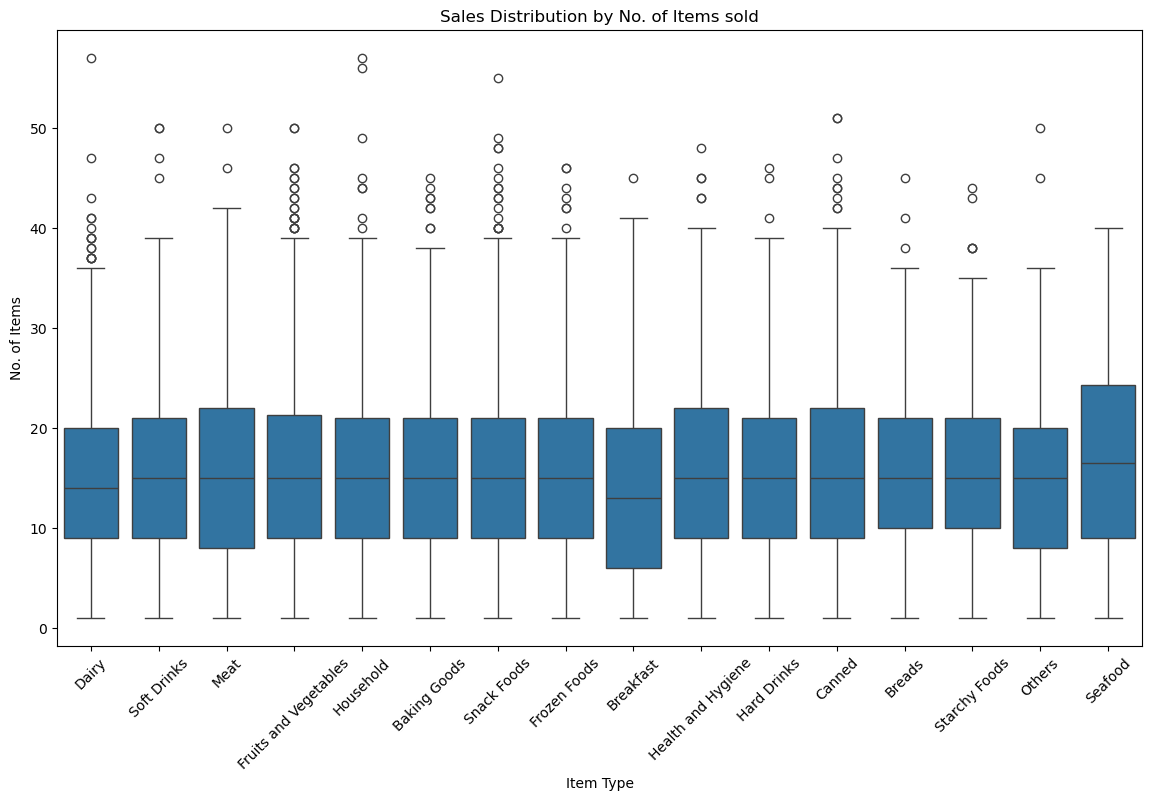

In [36]:
# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Item_Type', y='No_of_Items_Sold', data=train)
plt.title('Sales Distribution by No. of Items sold')
plt.xlabel('Item Type')
plt.ylabel('No. of Items')
plt.xticks(rotation=45)
plt.show()


This box-plot shows that many of the Item_Types has outliers indicating a number of products performing well above average (best-selling) which could be due to demand or promotions.

Seafood, comparitevely to other Item_types has less demand, due to absence of outliers.

Furthermore, Seafood and Breakfast has higher variability than other Item_Types, indicating that products under that category have different quantities sold. Thus these lower performing products should be concetrated and promoted.

INFERENCE:


1.   ***Snack Foods, Fruits and Vegetables, Dairy and Canned foods*** are best-selling

2.   ***Seafood, Breakfast*** are compartiviely,not in demand and ***less number of products are sold***. Thus these products must be promoted and advertised more.

3.   ***SeaFood, Breakfast and Meat*** have ***higher varibaility*** than other item_types. This indicates that products under the same category have different quantities sold. Thus stocking and storage should be adjusted with respect to that.  




In [37]:
#These are the best-selling and least-selling products under each category/Item_type.

#Grouping and summing to find the total number of items sold of that indiviudal product.
product_sales = train.groupby(['Item_Type', 'Item_Identifier'])['No_of_Items_Sold'].sum().reset_index()

#Out of the total number of items, I found the maximum under the Item_Type.
best = product_sales.loc[product_sales.groupby('Item_Type')['No_of_Items_Sold'].idxmax()]
best.reset_index(drop=True, inplace=True)

#Similiarly, the same is done to find the minimum.
least= product_sales.loc[product_sales.groupby('Item_Type')['No_of_Items_Sold'].idxmin()]
least.reset_index(drop=True, inplace=True)

print("Best-Selling Products by Item_Type:")
print(best)
print("\nLeast-Selling Products by Item_Type:")
print(least)

Best-Selling Products by Item_Type:
                Item_Type Item_Identifier  No_of_Items_Sold
0            Baking Goods           FDL24             151.0
1                  Breads           FDZ35             152.0
2               Breakfast           FDR37             149.0
3                  Canned           FDW13             176.0
4                   Dairy           FDA15             167.0
5            Frozen Foods           FDS16             166.0
6   Fruits and Vegetables           FDO19             183.0
7             Hard Drinks           DRQ35             148.0
8      Health and Hygiene           NCK53             172.0
9               Household           NCB18             168.0
10                   Meat           FDQ39             153.0
11                 Others           NCL31             183.0
12                Seafood           FDI57             146.0
13            Snack Foods           FDL34             178.0
14            Soft Drinks           DRE49             158.0
15  

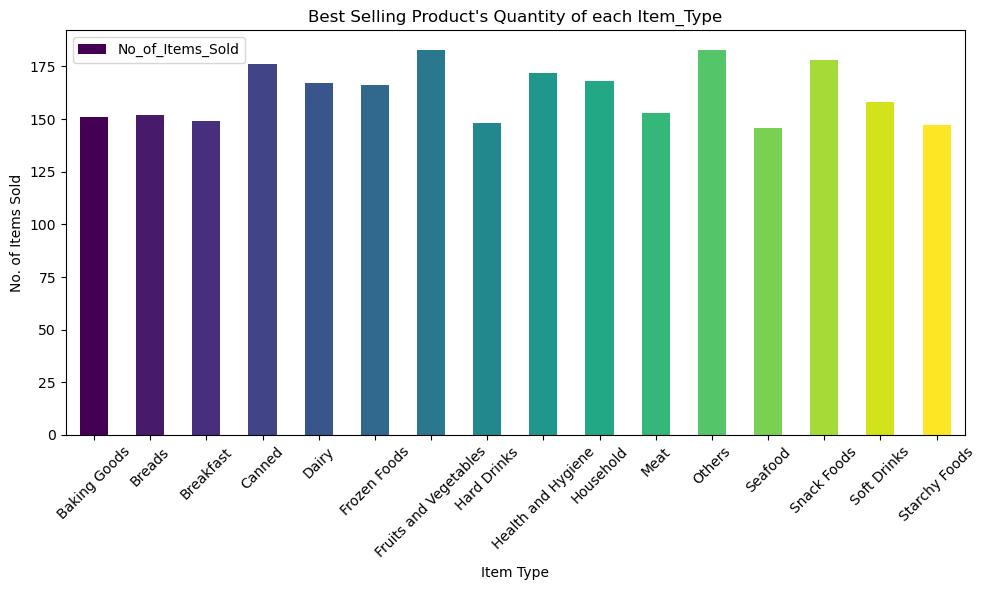

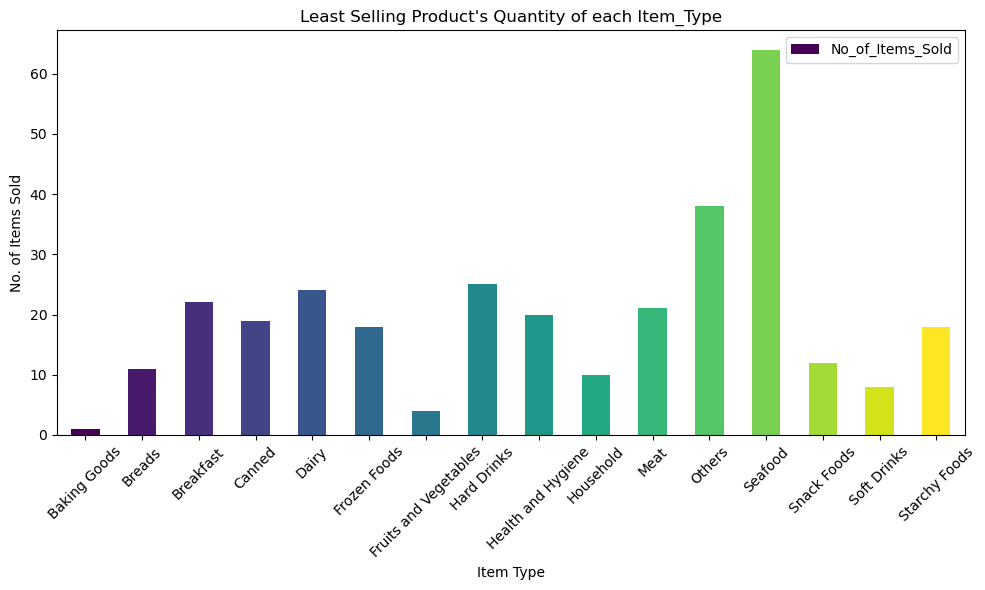

In [38]:
#Visualizing Best selling and Least selling product

colours=plt.cm.viridis(np.linspace(0,1,len(best)))
best.plot(x='Item_Type',y='No_of_Items_Sold',kind='bar', figsize=(10, 6),color=colours)

plt.title("Best Selling Product's Quantity of each Item_Type")
plt.xlabel("Item Type")
plt.ylabel("No. of Items Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

colours=plt.cm.viridis(np.linspace(0,1,len(best)))
least.plot(x='Item_Type',y='No_of_Items_Sold',kind='bar', figsize=(10, 6),color=colours)

plt.title("Least Selling Product's Quantity of each Item_Type")
plt.xlabel("Item Type")
plt.ylabel("No. of Items Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

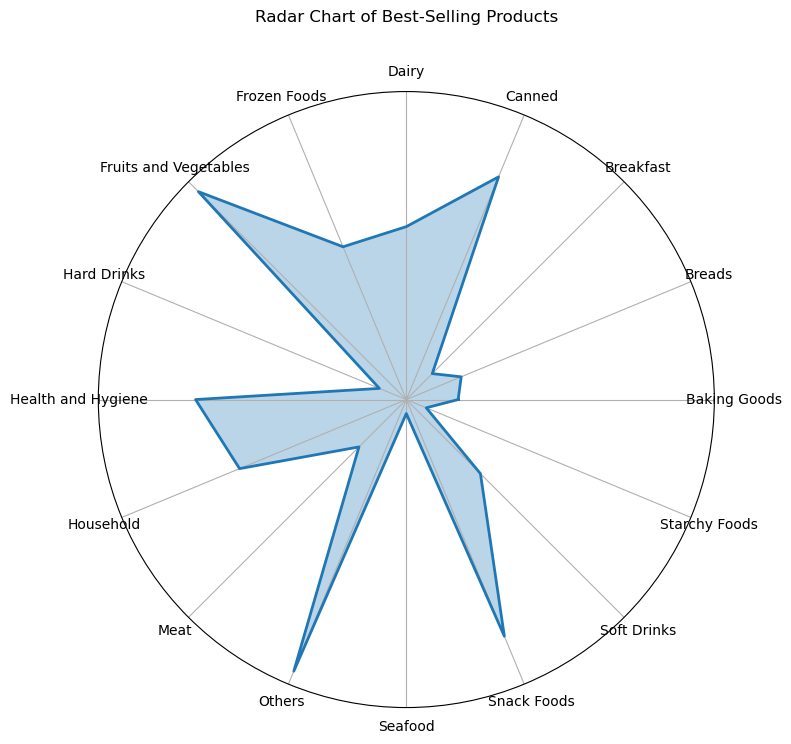

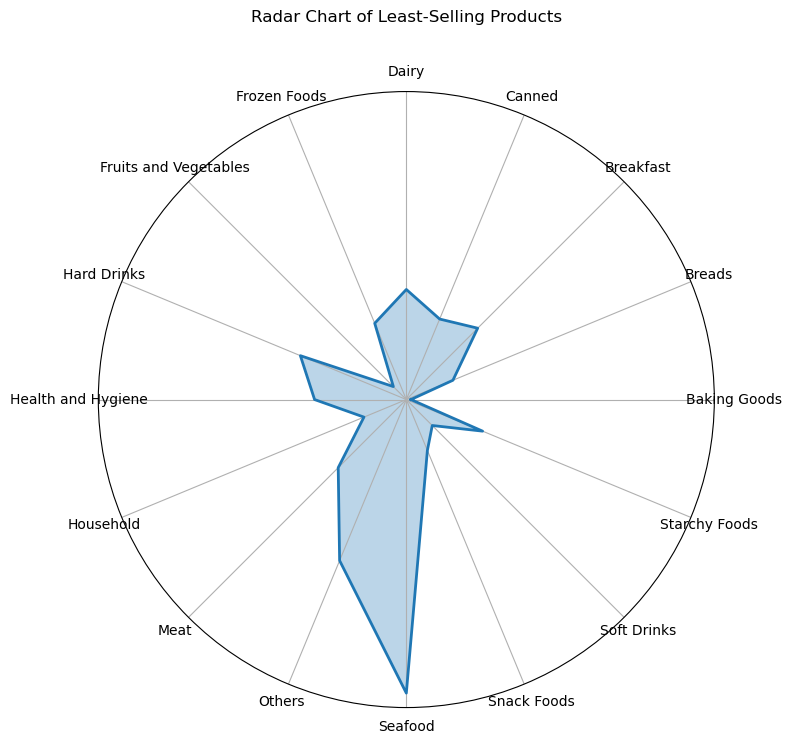

In [39]:

#Using a Radar Chart

categories = best['Item_Type']
values = best['No_of_Items_Sold']

values = np.append(values, values[0])
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.3)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, rotation=45)
plt.title("Radar Chart of Best-Selling Products", y=1.1)
plt.show()


categories = least['Item_Type']
values = least['No_of_Items_Sold']
values = np.append(values, values[0])
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.3)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, rotation=45)
plt.title("Radar Chart of Least-Selling Products", y=1.1)
plt.show()

From the Radar Chart and Bar Chart we can see that,

Fruits and Vegetables, Canned, Health and Hygiene, Snack Foods and Others has a very high Best-selling product comparitively.

On the otherhand, Seafoods, Starchy Foods, Meat, Hard Drinks, Bread, Breakfast and baking goods has an higher amount of least-sale than others.

Text(0.5, 1.02, 'Pairplot of Selected Features')

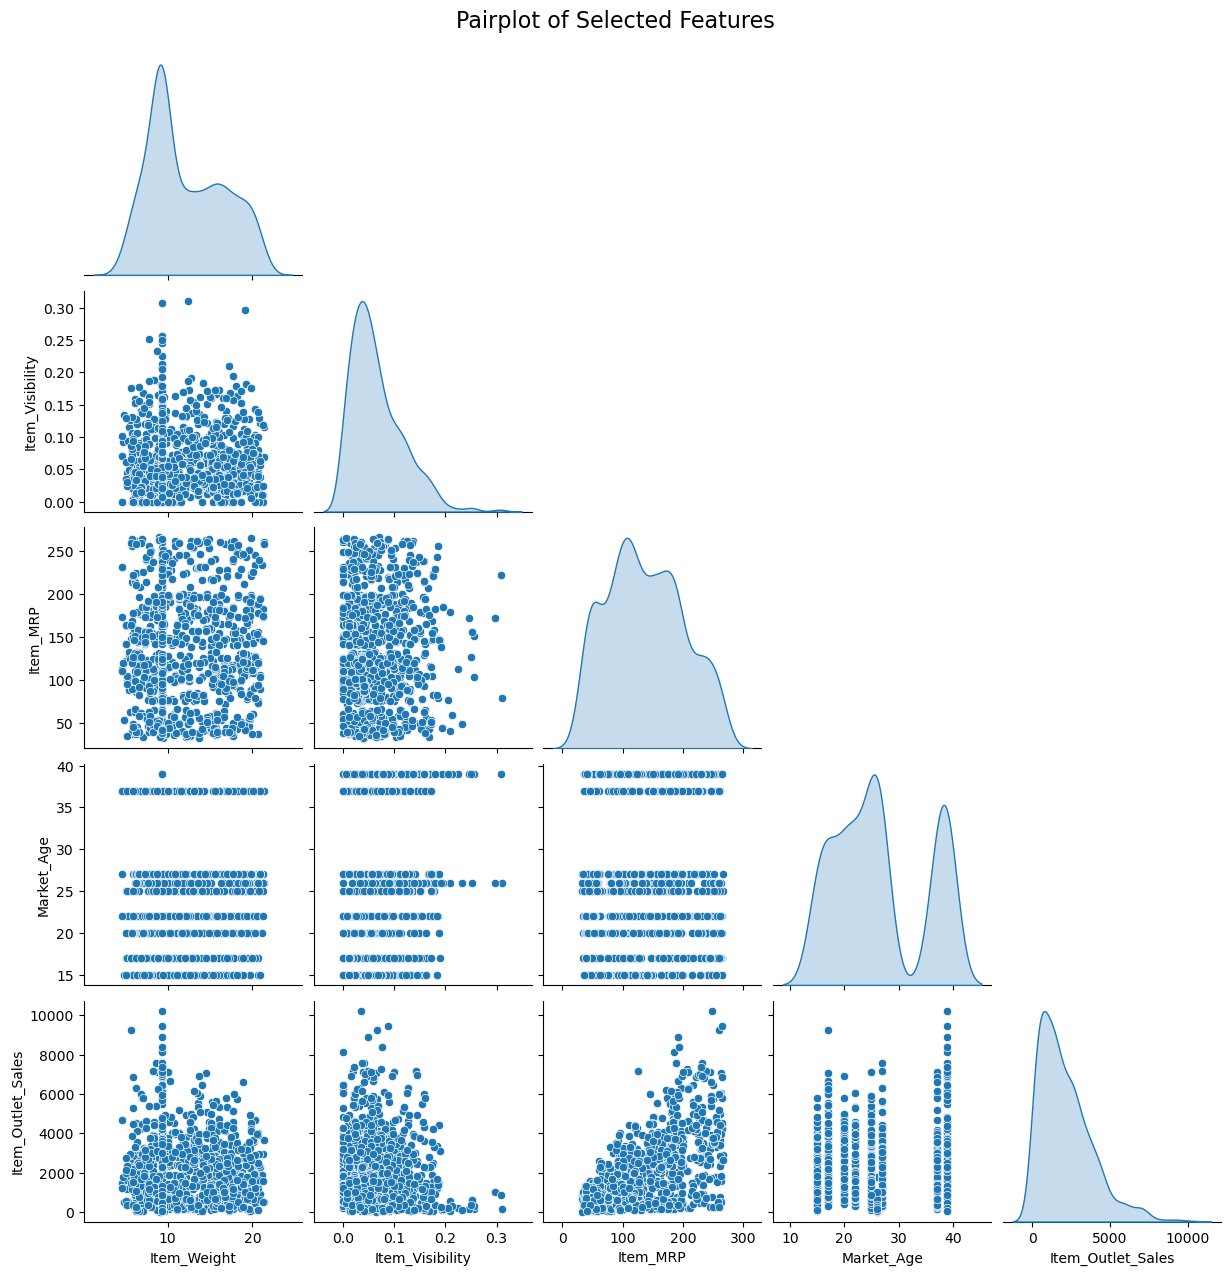

In [40]:
#BIVARIATE ANALYSIS
#PairPlot to compare Numerical values and Item_Outlet_Sales

import seaborn as sns
col=['Item_Weight','Item_Visibility','Item_MRP','Market_Age','Item_Outlet_Sales']
sns.pairplot(train[col].sample(1000,random_state=42), diag_kind='kde', corner=True)

plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)

In [41]:
train[col].corr()

,Item_Weight,Item_Visibility,Item_MRP,Market_Age,Item_Outlet_Sales
Item_Weight,1.000000,-0.039422,0.026242,-0.203217,-0.013399
Item_Visibility,-0.039422,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.026242,-0.001315,1.000000,-0.005020,0.567574
Market_Age,-0.203217,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,-0.013399,-0.128625,0.567574,0.049135,1.000000


From the pairplot and the correlation table,


1.   We can see that Item_MRP and Sales are **positively correlated**, since higher cost items generate more revenue. It is also noted that higher MRP priced-sales are lesser in number, but do generate higher revenue

2.   Whereas Item_Visibility and Sales are **negatively correlated** inferring that *highly visible items might not necessarily generate higher sales, possibly due to oversaturation or customer preferences.*

3.    Sales are dominated by a small number of high-performing products, consistent across all observations from the Item_Outlet_Sales KDE plot

4.   Market_Age does not have much effect on Item_Outlet_Sales, however a slight increase in sales is observed in older stores possibly due to regular customers.

5.   Item_Weight and Item_Outlet_Sales do not show any clear trend, indicating that item_weight do not directly influence item_outlet_sales

INFERENCE:

Item_Weight and Market_Age do not contribute much to Item_Outlet_Sales.

Highly Visible Items might not necessarily generate more sales.


In [42]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Market_Age,No_of_Items_Sold
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25,15.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15,9.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25,15.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26,4.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,37,13.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,22,5.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,20,14.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,15,18.0


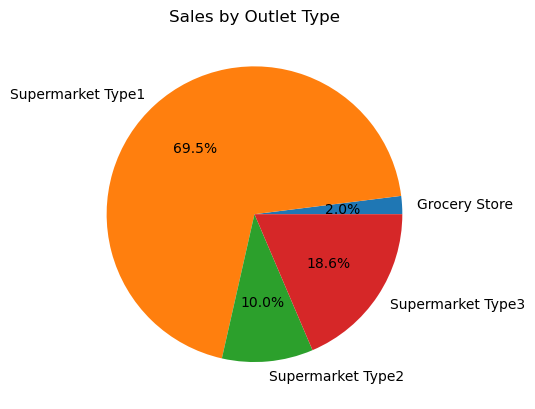

Share of Supermarket Type1 is 69.48 %
Share of Supermarket Type2 is 9.96 %
Share of Grocery Store is 1.98 %
Share of Supermarket Type3 is 18.58 %


In [43]:
#Contribution of Outlet Types to Revenue
train.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot(kind='pie',autopct="%1.1f%%")
plt.title('Sales by Outlet Type')
plt.xlabel('')
plt.ylabel('')
plt.show()


def share(train):
  typ= train['Outlet_Type'].unique()
  for i in typ:
    print("Share of",i,"is",((train[train['Outlet_Type']==i]['Item_Outlet_Sales'].sum()*100/train['Item_Outlet_Sales'].sum()).round(2)),"%")
share(train)

**CONCLUSION OF EDA:**

1. Item_MRP and Sales are positively correlated, since higher cost items generate more revenue. It is also noted that higher MRP priced sales are lesser in number, but do generate higher revenue.

2. Highly visible items might not necessarily generate higher sales, possibly due to oversaturation or customer preferences.

3. Sales are dominated by a small number of high-performing products, consistent across all outlets.

4. Market_Age does not have much effect on Item_Outlet_Sales, however a slight increase in sales is observed in older stores possibly due to regular customers

5. Snack Foods, Fruits and Vegetables, Dairy and Canned foods are best-selling

6. Seafood, Breakfast are compartiviely,not in demand and less number of products are sold. *Thus these products must be promoted and advertised more.*

7. SeaFood, Breakfast and Meat have higher varibaility than other item_types. This indicates that products under the same category have different quantities sold.*Thus stocking and storage should be adjusted with repsect to that.*

8.  a few best selling items contribute more, and are dominant financially and not numerically, or in other words, they generate more revenue, despite being fewer in number.

9. Low fat content Food are more preferred than Regular Fat content food.

10. The number of Fruits and Vegetables, Snack Foods, Household and Frozen foods contribute to nearly half of the total items present.

11. There are more number of Medium Sized outlets than Small-Sized and High-Sized Outlet combined together.

12. The individual least-selling products of each Item_Type have been mentioned above, and so respective promotions or advertisement of the product can be undertaken to boost sales.

13. Approximately, 70% of the contribution of Revenue are from Supermarket Type 1, followed by Supermarket Type3 (18.5%), Supermarket Type2 (9.96%) and Grocery Store(1.98%)

14. Item_weight do not directly influence the Item_Outlet_Sales, indicating that weight has nothing to do with Revenue.
    
15. The sales performance is approximately, consistent and uniform across all the outlets.

In [44]:
#SALES PREDICTION
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Market_Age,No_of_Items_Sold
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25,15.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15,9.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25,15.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26,4.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,37,13.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,22,5.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,20,14.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,15,18.0


In [45]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [46]:
#LINEAR REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

data=train

# Define features (X) and target variable (y)
X = data.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','No_of_Items_Sold'])
y = data['Item_Outlet_Sales']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("LINEAR REGRESSION")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

LINEAR REGRESSION
Mean Squared Error: 1068.9444133953814
R-squared: 0.579597224795218


In [47]:
#XGBOOST

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load Data
train_data = train

# Prepare Data
X = train_data.drop(columns=['Item_Outlet_Sales','No_of_Items_Sold'])
y = train_data['Item_Outlet_Sales']
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("XGBOOST")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


XGBOOST
RMSE: 1063.7641558970872
R^2 Score: 0.5836620155349873


In [48]:
#try desicion tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Load Data
train_data = train

# Prepare Data
X = train_data.drop(columns=['Item_Outlet_Sales','No_of_Items_Sold'])
y = train_data['Item_Outlet_Sales']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.copy()
X_encoded['Item_Fat_Content'] = label_encoder.fit_transform(X['Item_Fat_Content'])
X_encoded['Item_Type'] = label_encoder.fit_transform(X['Item_Type'])
X_encoded['Outlet_Size'] = label_encoder.fit_transform(X['Outlet_Size'])
X_encoded['Outlet_Location_Type'] = label_encoder.fit_transform(X['Outlet_Location_Type'])
X_encoded['Outlet_Type'] = label_encoder.fit_transform(X['Outlet_Type'])
X_encoded['Outlet_Identifier'] = label_encoder.fit_transform(X['Outlet_Identifier'])
X_encoded['Item_Identifier'] = label_encoder.fit_transform(X['Item_Identifier'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("DECESION TREES")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

DECESION TREES
RMSE: 1027.420278722264
MAE: 721.1381949325059
R^2 Score: 0.6116247040042955


In [49]:
X_encoded

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Market_Age
0,156,9.300,0,0.016047,4,249.8092,9,1,0,1,25
1,8,5.920,1,0.019278,14,48.2692,3,1,2,2,15
2,662,17.500,0,0.016760,10,141.6180,9,1,0,1,25
3,1121,19.200,1,0.000000,6,182.0950,0,2,2,0,26
4,1297,8.930,0,0.000000,9,53.8614,1,0,2,1,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,0,2,1,37
8519,897,8.380,1,0.046982,0,108.1570,7,1,1,1,22
8520,1357,10.600,0,0.035186,8,85.1224,6,2,1,1,20
8521,681,7.210,1,0.145221,13,103.1332,3,1,2,2,15


In [50]:
#try desicion tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Load Data
train_data = train

# Prepare Data
X = train_data.drop(columns=['Item_Outlet_Sales','No_of_Items_Sold','Item_Weight','Market_Age'])
y = train_data['Item_Outlet_Sales']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.copy()
X_encoded['Item_Fat_Content'] = label_encoder.fit_transform(X['Item_Fat_Content'])
X_encoded['Item_Type'] = label_encoder.fit_transform(X['Item_Type'])
X_encoded['Outlet_Size'] = label_encoder.fit_transform(X['Outlet_Size'])
X_encoded['Outlet_Location_Type'] = label_encoder.fit_transform(X['Outlet_Location_Type'])
X_encoded['Outlet_Type'] = label_encoder.fit_transform(X['Outlet_Type'])
X_encoded['Outlet_Identifier'] = label_encoder.fit_transform(X['Outlet_Identifier'])
X_encoded['Item_Identifier'] = label_encoder.fit_transform(X['Item_Identifier'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("DECESION TREES")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

feature_importances = dt_model.feature_importances_
features = X_encoded.columns

# Display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

DECESION TREES
RMSE: 1027.420278722264
MAE: 721.1381949325059
R^2 Score: 0.6116247040042955

Feature Importance:
                Feature  Importance
4              Item_MRP    0.551464
8           Outlet_Type    0.447335
2       Item_Visibility    0.000990
0       Item_Identifier    0.000180
3             Item_Type    0.000023
7  Outlet_Location_Type    0.000008
1      Item_Fat_Content    0.000000
5     Outlet_Identifier    0.000000
6           Outlet_Size    0.000000


In [51]:
X_encoded

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,0.016047,4,249.8092,9,1,0,1
1,8,1,0.019278,14,48.2692,3,1,2,2
2,662,0,0.016760,10,141.6180,9,1,0,1
3,1121,1,0.000000,6,182.0950,0,2,2,0
4,1297,0,0.000000,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,370,0,0.056783,13,214.5218,1,0,2,1
8519,897,1,0.046982,0,108.1570,7,1,1,1
8520,1357,0,0.035186,8,85.1224,6,2,1,1
8521,681,1,0.145221,13,103.1332,3,1,2,2


In [56]:
#try desicion tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Load Data
train_data = train

# Prepare Data
X = train_data.drop(columns=['Item_Outlet_Sales','No_of_Items_Sold','Item_Weight','Market_Age','Outlet_Size','Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type'])
y = np.log1p(train_data['Item_Outlet_Sales'])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_encoded['Item_Type'] = label_encoder.fit_transform(X['Item_Type'])
X_encoded['Outlet_Type'] = label_encoder.fit_transform(X['Outlet_Type'])
X_encoded['Item_Identifier'] = label_encoder.fit_transform(X['Item_Identifier'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("DECESION TREES")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

feature_importances = dt_model.feature_importances_
features = X_encoded.columns

# Display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

DECESION TREES
RMSE: 0.5279833663023853
MAE: 0.40947484915732035
R^2 Score: 0.7348475758312951

Feature Importance:
                Feature  Importance
8           Outlet_Type    0.618193
4              Item_MRP    0.379187
5     Outlet_Identifier    0.000999
2       Item_Visibility    0.000766
0       Item_Identifier    0.000560
1      Item_Fat_Content    0.000295
3             Item_Type    0.000000
6           Outlet_Size    0.000000
7  Outlet_Location_Type    0.000000


In [57]:


# Reverse log transformation
y_pred_original = np.expm1(y_pred)  # Reverse log1p transformation for predictions
y_test_original = np.expm1(y_test)  # Reverse log1p transformation for true values

# Calculate RMSE and MAE on the original scale
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae_original = mean_absolute_error(y_test_original, y_pred_original)

# Calculate R² on the original scale
r2_original = r2_score(y_test_original, y_pred_original)

# Print the metrics
print(f"RMSE (Original Scale): {rmse_original}")
print(f"MAE (Original Scale): {mae_original}")
print(f"R^2 Score (Original Scale): {r2_original}")


RMSE (Original Scale): 1048.7820042096587
MAE (Original Scale): 724.0386133297726
R^2 Score (Original Scale): 0.5953069145742222


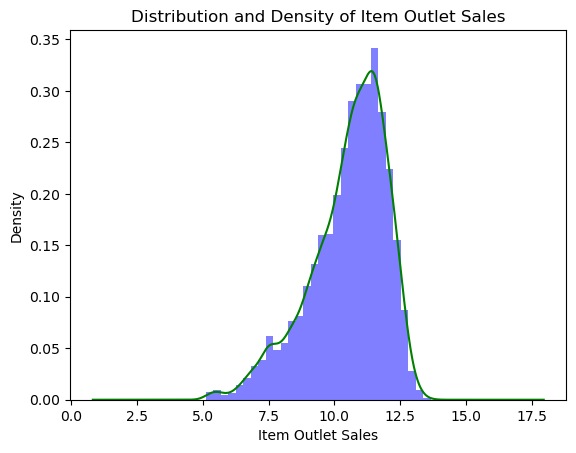

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Type,Item_Outlet_Sales
0,156,0.016047,4,249.8092,1,11.867332
1,8,0.019278,14,48.2692,2,8.795789
2,662,0.016760,10,141.6180,1,11.034985
3,1121,0.000000,6,182.0950,0,9.518417
4,1297,0.000000,9,53.8614,1,9.959575
...,...,...,...,...,...,...
8518,370,0.056783,13,214.5218,1,11.440549
8519,897,0.046982,0,108.1570,1,9.104035
8520,1357,0.035186,8,85.1224,1,10.221724
8521,681,0.145221,13,103.1332,2,10.850654


In [54]:
m=train.drop(columns=['No_of_Items_Sold','Item_Weight','Market_Age','Outlet_Size','Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type'])

label_encoder = LabelEncoder()
m['Item_Type'] = label_encoder.fit_transform(m['Item_Type'])
m['Outlet_Type'] = label_encoder.fit_transform(m['Outlet_Type'])
m['Item_Identifier'] = label_encoder.fit_transform(m['Item_Identifier'])
m['Item_Outlet_Sales']=np.log2(m['Item_Outlet_Sales']+1)

m['Item_Outlet_Sales'].plot(kind='hist', bins=30, alpha=0.5, density=True, color='blue')
m['Item_Outlet_Sales'].plot(kind='kde', color='green')

plt.title('Distribution and Density of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.show()
m